In [66]:
import numpy as np
import scipy
from scipy.spatial import distance as dist
import pandas as pd
from tesser import sr
from tesser import network
from tesser import util
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
objseq = util.load_struct ('/Users/Zhonghou/Desktop/General/Preston Lab/Data', 100)
adjacency = network.adjacency (network.node_info())


BBHA = pd.read_csv('/Users/Zhonghou/Desktop/100_betas_b_hip_ant.txt', sep=' ', header=None)

def compute_RDM (matrix):
    return dist.squareform (dist.pdist (matrix, 'correlation'))
    
def compute_SRs ():
    SR_list = []
    for gamma in [.5]:
        SRs = [sr.explore_runs (objseq, 'independent', gamma, .1)[(2, k+1)] for k in range(6)]
        for sr1 in SRs:
            sr1 = np.maximum(sr1, sr1.transpose())
            SR_list.append(sr1)
    return np.vstack (SR_list)

def compute_distances (sr_matrix):
    return dist.squareform(dist.pdist (sr_matrix))





In [67]:
RDM_BBHA = dist.squareform(compute_RDM (BBHA))
SRs = compute_SRs()
RDM_SRs = compute_RDM (SRs)
RDM_SRs = dist.squareform(RDM_SRs, checks=False)
distances = compute_distances(SRs)
print ("Distances:", distances)
correlation = pearsonr (RDM_BBHA, RDM_SRs)
print("Correlation:", correlation)

Distances: [[0.         0.73906889 0.87918589 ... 0.67958722 0.84975087 0.70763766]
 [0.73906889 0.         0.9215913  ... 0.60891834 0.84514584 0.70481403]
 [0.87918589 0.9215913  0.         ... 0.93322134 1.043672   0.91662926]
 ...
 [0.67958722 0.60891834 0.93322134 ... 0.         0.83203435 0.70664635]
 [0.84975087 0.84514584 1.043672   ... 0.83203435 0.         0.79141004]
 [0.70763766 0.70481403 0.91662926 ... 0.70664635 0.79141004 0.        ]]
Correlation: (0.011836772639516798, 0.29358966602569914)


In [63]:
RDM_BBHA.shape, RDM_SRs.shape

((7875,), (26565,))

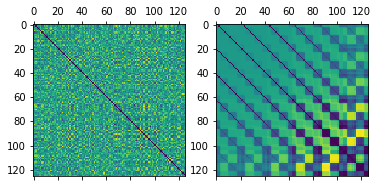

In [21]:
fig, ax = plt.subplots(1, 2)
ax[0].matshow(dist.squareform(RDM_BBHA))
ax[1].matshow(dist.squareform(RDM_SRs))